##   **Predicting House Rent** 




##  **Introduction:**

Brazil Housing is an Public dataset.
 In this dataset there are total 13 features and 10692 data-points.

We have house info like  city, area, rooms, parking space etc. 
On this basis we have to predict the “total” rent of house.
Here target variable is “total (R$)” column.

##  **Objective:**



In this notebook, we are supposed to clean data,exploratory data analysis , feature engineering, data treatment and application of Machine Learning models to predict the 'total (R$)'.



## **Dataset Information:**



Brazil Housing is an Public dataset.
 In this dataset there are total 13 features and 10692 data-points.

The features columns in the dataset are:
1. city - city located
2. area - area of house
3.    rooms - quantity of rooms
4.   bathroom - quantity of bathrooms
5.    parking spaces - quantity of parking spaces
6.    floor - floor
7.    animal - acept animals or not
8.    furniture - furnish or not
9.    hoa - Homeowners association tax
10.    property tax - property tax
1.   rent amount - rental price
1.    fire insurance - fire insurance
1.    total - total value



## **Important process followed :**



*   Dataset Preparation and Preprocessing
*   Model Training
*   Model Testing and Evaluation
*   Conclusion






### **Data preprocessing, Data cleaning, Model Preparation, Model Fitting:**

following are the steps:
1.   Read the file and explore dataset.
2.  Preprocess the data and feature engineering:(Perform an exploratory analysis of the data in order to gain insights and    choose the best features )
  1.   Check the null values from the dataset and handle them appropriately. 
  2.   Remove the insignificant columns from the dataset if necessary.
  1.  Convert the categorical columns to numerical columns.
  1.   labelling 
2. Perform EDA on the dataset using visualization such as bar plot ,  Box  plot , count plot etc. 
2.Split the data into training and testing.
1.train the model with differnt regression techniques.
2. Observe the accuracy of each model and conclude which model gives the maximum accuracy.
1.select model with maximum accuracy and test the data.

Lets start working on dataset

Import required libraries:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

In [4]:
df1=pd.read_csv('brazil_housing.csv')

In [5]:
df1.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [6]:
df1.shape

(10692, 13)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [8]:

df1.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [9]:
df1.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [10]:
df1.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

No Null values *present*

In [11]:
df1.isnull().describe()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692,10692,10692,10692,10692,10692,10692,10692,10692,10692,10692,10692,10692
unique,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,10692,10692,10692,10692,10692,10692,10692,10692,10692,10692,10692,10692,10692


rename the columns for better of computations

In [12]:
df1.rename(columns={'hoa (R$)':'hoa','rent amount (R$)':'rent amount','property tax (R$)':'property tax','fire insurance (R$)':'fire insurance','total (R$)':'total'},inplace=True)

In [13]:
df1

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [14]:
df1['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

lets explore to floor feature

In [15]:
df1.floor.unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

Floor column consists of '-' value. to convert it to numerical, we will replace it with 1 (minimum value). 

Also we will convert this categorical feature to Numerical feature for computation purpose.

In [16]:
df1['floor']=df1['floor'].replace('-',1)
df1['floor']=df1['floor'].apply(lambda x:int(x))

In [17]:
df1.floor.unique()

array([  7,  20,   6,   2,   1,   4,   3,  10,  11,  24,   9,   8,  17,
        18,   5,  13,  15,  16,  14,  26,  12,  21,  19,  22,  27,  23,
        35,  25,  46,  28,  29, 301,  51,  32])

here, floor has value= 301, which is impossible. This is a outlier.

In [18]:
df1[df1['floor']==51]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
5694,Campinas,64,2,2,2,51,acept,not furnished,800,1900,129,25,2854


In [19]:
df1[(df1['city']=='Campinas') & (df1['floor']>20)]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
5694,Campinas,64,2,2,2,51,acept,not furnished,800,1900,129,25,2854


This tells that 'Campinas' city has generally no building with floor value greater than 20. Again this is an outlier.

In [20]:
df1.floor.value_counts()

1      3542
2       985
3       931
4       748
5       600
6       539
7       497
8       490
9       369
10      357
11      303
12      257
13      200
14      170
15      147
16      109
17       96
18       75
19       53
20       44
21       42
25       25
23       25
22       24
26       20
24       19
27        8
28        6
29        5
32        2
51        1
301       1
46        1
35        1
Name: floor, dtype: int64

In [21]:
df1[df1['floor']>45]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
1654,São Paulo,353,4,5,5,46,acept,not furnished,3000,10000,0,127,13130
2562,Belo Horizonte,80,3,2,2,301,acept,not furnished,750,2600,164,35,3549
5694,Campinas,64,2,2,2,51,acept,not furnished,800,1900,129,25,2854


This are the outlier with respect to floor feature. lets remove them as follows.

In [22]:

df1=df1[df1['floor']<45]

In [23]:
df1.describe()

,area,rooms,bathroom,parking spaces,floor,hoa,rent amount,property tax,fire insurance,total
count,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,1.068900e+04,10689.000000,10689.000000,10689.000000,1.068900e+04
mean,149.213303,2.505941,2.236598,1.608757,5.262419,1.173926e+03,3895.984189,366.779867,53.298344,5.490201e+03
std,537.087637,1.171322,1.407138,1.589396,5.114125,1.559448e+04,3408.434795,3108.264964,47.768303,1.648684e+04
min,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061000e+03
50%,90.000000,2.000000,2.000000,1.000000,3.000000,5.600000e+02,2662.000000,125.000000,36.000000,3.582000e+03
75%,182.000000,3.000000,3.000000,2.000000,8.000000,1.237000e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,35.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [24]:
corr=df1.corr()
corr['total']

area              0.051780
rooms             0.134554
bathroom          0.208290
parking spaces    0.148632
floor             0.043958
hoa               0.955031
rent amount       0.264448
property tax      0.218350
fire insurance    0.254869
total             1.000000
Name: total, dtype: float64

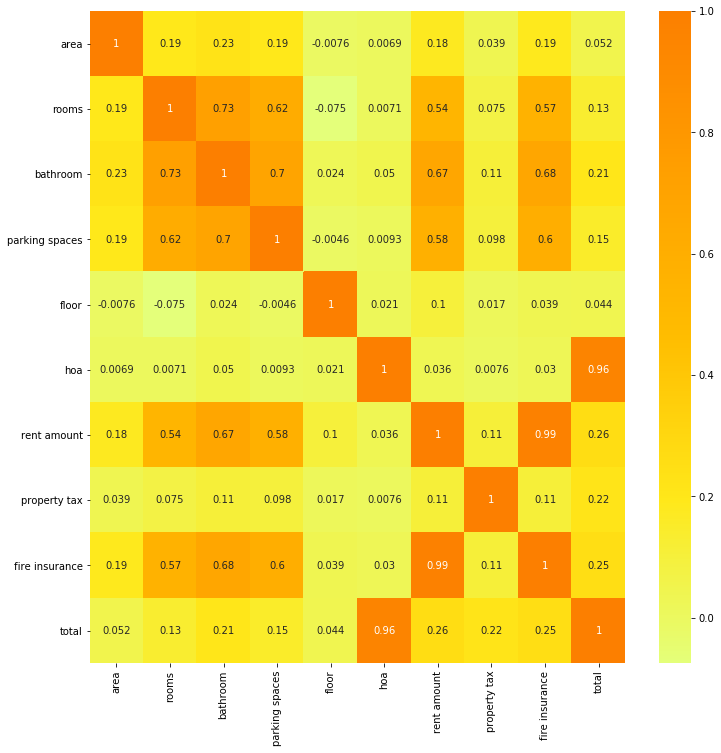

In [25]:
fig = plt.figure(figsize=(12,12))
sns.heatmap(corr, cmap = 'Wistia', annot= True);

From the above heapmap, once can easily predict that, floor feature is least corelated with total. so lets remove this feature

In [26]:
df2=df1.drop('floor',axis='columns')

In [27]:
df2.head()

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,São Paulo,70,2,1,1,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,not acept,not furnished,0,800,25,11,836


# **Convert the categorical columns to numerical columns.:**
animal is categorical feature.we will convert this categorical feature to Numerical feature by simple labling.
1: acept
0: not acept

In [28]:
animal_info=pd.DataFrame()
animal_info['name']=df2.animal.unique()
animal_info['label']=[1,0]
animal_info

,name,label
0,acept,1
1,not acept,0


In [29]:

df2['animal']=df2['animal'].replace({'acept':1,'not acept':0})

In [30]:
df2.head()

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,São Paulo,70,2,1,1,1,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,1,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,1,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,1,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,0,not furnished,0,800,25,11,836


In [31]:
df2.animal.describe()

count    10689.000000
mean         0.777715
std          0.415801
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: animal, dtype: float64

furniture is categorical feature.we will convert this categorical feature to Numerical feature by simple labling.
1: furnished
0: not furnished

In [32]:
furniture_info=pd.DataFrame()
furniture_info['name']=df2.furniture.unique()
furniture_info['label']=[1,0]
furniture_info

,name,label
0,furnished,1
1,not furnished,0


In [33]:
df2['furniture']=df2['furniture'].replace({'furnished':1,'not furnished':0})

In [34]:
city_info=pd.DataFrame(df2['city'].unique())
city_info

,0
0,São Paulo
1,Porto Alegre
2,Rio de Janeiro
3,Campinas
4,Belo Horizonte


In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df2['city']=le.fit_transform(df2['city'])

In [36]:
city_info['label']=df2['city'].unique()

In [37]:
city_info

,0,label
0,São Paulo,4
1,Porto Alegre,2
2,Rio de Janeiro,3
3,Campinas,1
4,Belo Horizonte,0


we will keep 'city' column for next few steps

In [38]:
df2.head()

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,4,70,2,1,1,1,1,2065,3300,211,42,5618
1,4,320,4,4,0,1,0,1200,4960,1750,63,7973
2,2,80,1,1,1,1,0,1000,2800,0,41,3841
3,2,51,2,1,0,1,0,270,1112,22,17,1421
4,4,25,1,1,0,0,0,0,800,25,11,836


In [39]:
df2.mode()

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,4,50,3,1,1,1,0,0,2500,0,16,2555


## Lets explore animal feature:

In [40]:
animal_info

,name,label
0,acept,1
1,not acept,0


In [41]:
df2.animal.value_counts()

1    8313
0    2376
Name: animal, dtype: int64

/home/rupam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


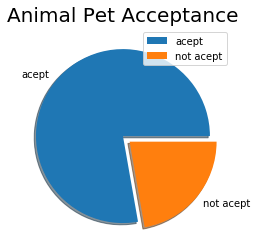

<Figure size 432x288 with 0 Axes>

In [42]:
size = [df2.animal.value_counts()]
labels = ['acept', 'not acept']
plt.pie(size, labels = labels, shadow = True, explode = [0, 0.1],radius=1)
plt.legend()
plt.title('Animal Pet Acceptance', fontsize = 20)
plt.show()
plt.tight_layout()

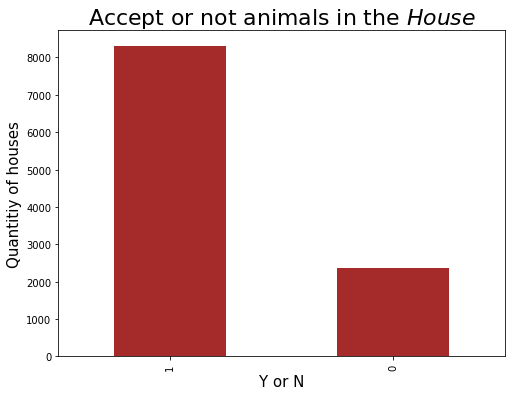

In [43]:
ax = df2['animal'].value_counts().plot(kind = 'bar',figsize = (8,6),color = 'brown')
ax.set_title('Accept or not animals in the $House$', fontsize = 22)
ax.set_xlabel('Y or N', fontsize = 15)
ax.set_ylabel('Quantitiy of houses' , fontsize = 15)
plt.show()

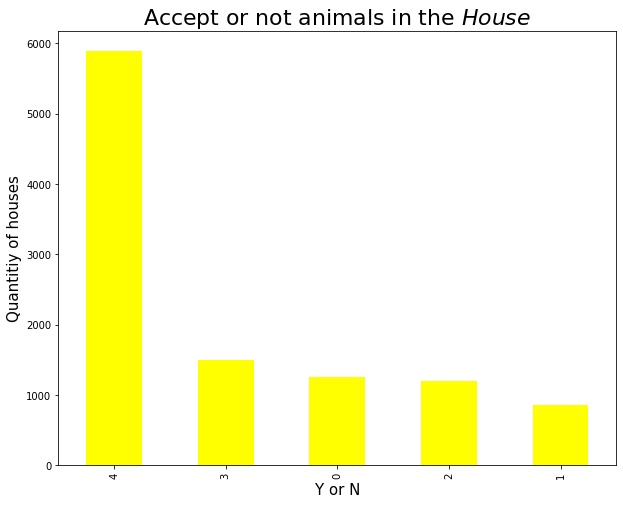

In [44]:
ax = df2['city'].value_counts().plot(kind = 'bar',figsize = (10,8),color = 'yellow')
ax.set_title('Accept or not animals in the $House$', fontsize = 22)
ax.set_xlabel('Y or N', fontsize = 15)
ax.set_ylabel('Quantitiy of houses' , fontsize = 15)
plt.show()

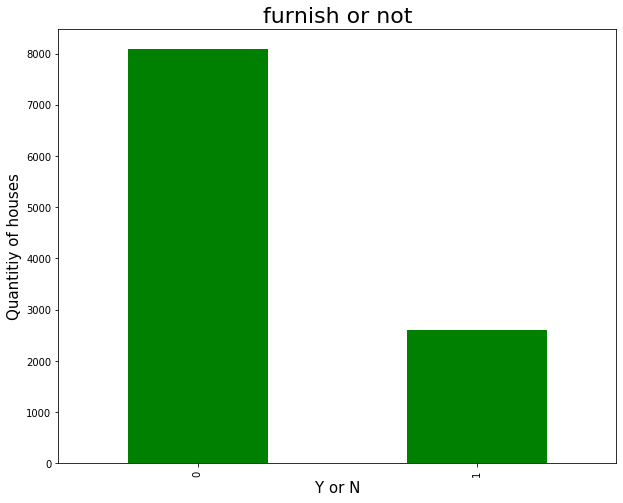

In [45]:
ax = df2['furniture'].value_counts().plot(kind = 'bar',figsize = (10,8),color = 'green')
ax.set_title('furnish or not', fontsize = 22)
ax.set_xlabel('Y or N', fontsize = 15)
ax.set_ylabel('Quantitiy of houses' , fontsize = 15)
plt.show()

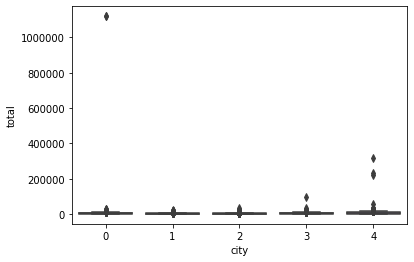

In [46]:
sns.boxplot(x = 'city', y ='total', data = df2)

This shows the total amount variation in differnt cities.
also one can easily observe that our dataset contains various outliers.

lets remove those outlier

In [47]:
city_group = df2.groupby('city')['total']
type(city_group)

pandas.core.groupby.generic.SeriesGroupBy

In [48]:
Q1 = city_group.quantile(.25)
Q3 = city_group.quantile(.75)
IIQ = Q3 - Q1  
lower_limit = Q1 - 1.5* IIQ
upper_limit = Q3 + 1.5* IIQ


In [49]:
Q1

city
0    1610.0
1    1416.0
2    1465.0
3    2067.0
4    2630.0
Name: total, dtype: float64

In [50]:
Q3

city
0    5934.00
1    3632.25
2    3338.00
3    5566.00
4    8590.00
Name: total, dtype: float64

In [51]:
city_group.groups.keys()

dict_keys([0, 1, 2, 3, 4])

In [52]:
new_data = pd.DataFrame()

for city in city_group.groups.keys():
    is_city = df2['city'] == city
    accepted_limit = ((df2['total'] >= lower_limit[city]) &
                     (df2['total'] <= upper_limit[city]))
    
    select = is_city & accepted_limit
    data_select = df2[select]
    new_data = pd.concat([new_data, data_select])

df3=new_data

This is how we have removed outliers.

In [53]:
new_data.shape

(10092, 12)

In [54]:
df3

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
21,0,42,1,1,1,0,1,470,2690,172,36,3368
27,0,64,2,2,1,1,0,352,1500,80,20,1952
37,0,80,3,2,1,1,0,0,11000,425,181,11610
42,0,200,4,2,1,0,0,850,2550,9,34,3443
43,0,45,1,1,1,1,0,500,1631,192,12,2335
...,...,...,...,...,...,...,...,...,...,...,...,...
10681,4,230,3,5,3,0,0,3800,11000,1100,140,16040
10683,4,280,4,4,2,1,0,4200,4000,1042,51,9293
10685,4,83,3,2,2,1,0,888,7521,221,96,8726
10686,4,150,3,3,2,0,1,0,13500,0,172,13670


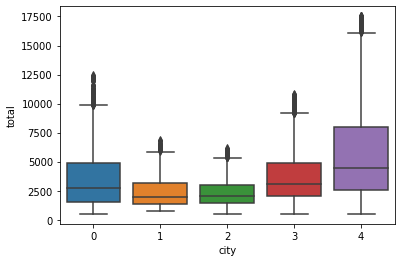

In [55]:
sns.boxplot(x = 'city', y ='total', data = df3)

Above, plot is the boxplot for new data after removing outliers with respect to city and total.
plot shows that our data is pretty good and one can observe that city named '4' which is São Paulo' has comparitively higher prices which is making it costly city.

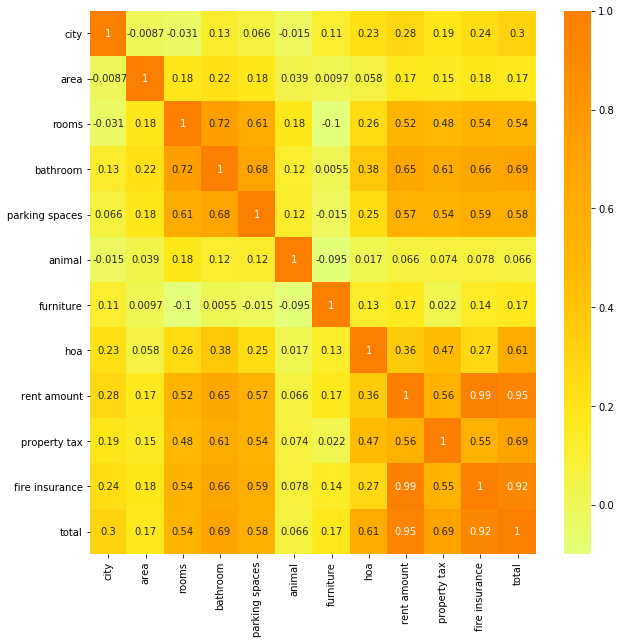

In [56]:
fig = plt.figure(figsize=(10,10))
corr = df3.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

heatmap shows that there is strong relationship between following components:


*   fire insurance and rent amount
*   fire insurance and total
*   total and rent amount
*   room and total
*   room and bathroom
*  hoa and total

lets explore them with graphical view:







Text(0.5, 1.0, 'bathrooms x total')

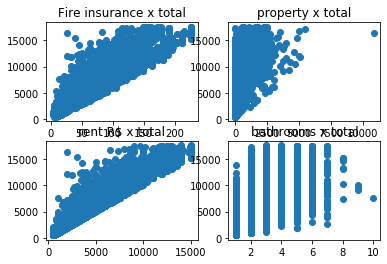

In [57]:
area = plt.figure()
g1 = area.add_subplot(2,2,1)
g2 = area.add_subplot(2,2,2)
g3 = area.add_subplot(2,2,3)
g4 = area.add_subplot(2,2,4)
g1.scatter(df3['fire insurance'], df3['total'])
g1.set_title('Fire insurance x total')
g2.scatter(df3['property tax'],df3['total'])
g2.set_title('property x total')
g3.scatter(df3['rent amount'],df3['total'])
g3.set_title('rent R$ x total')
g4.scatter(df3['bathroom'],df3['total'])
g4.set_title('bathrooms x total')

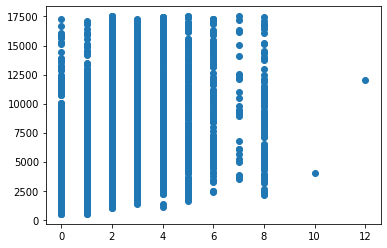

In [58]:
plt.scatter(df3['parking spaces'], df3['total'])

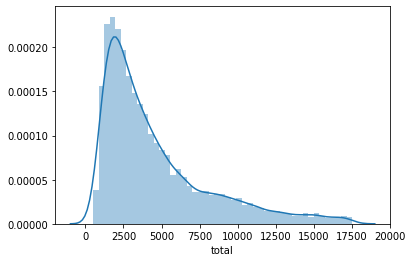

In [59]:
sns.distplot(df3['total'])



 mu = 4576.43 and sigma = 3546.17



Text(0.5, 1.0, 'total (R$) distribution')

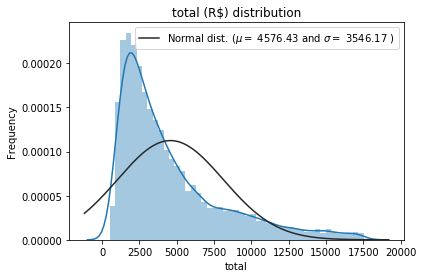

In [60]:
sns.distplot(df3['total'], fit=norm);

(mu, sigma) = norm.fit(df3['total'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('total (R$) distribution')


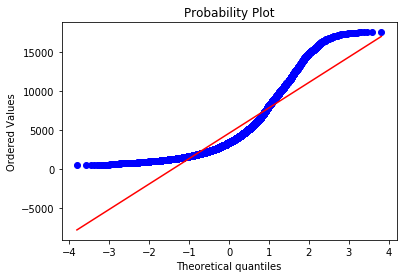

In [61]:
fig = plt.figure()
stats.probplot(df3['total'], plot=plt)
plt.show()

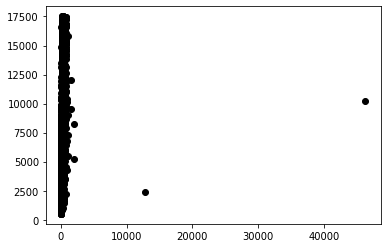

In [62]:
plt.scatter(y =df3['total'],x = df3.area,c = 'black')
plt.show()


In [69]:
Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3- Q1
print(IQR, df3.shape)

city                 2.0
area               105.0
rooms                1.0
bathroom             2.0
parking spaces       2.0
animal               0.0
furniture            0.0
hoa                930.0
rent amount       2848.0
property tax       284.0
fire insurance      39.0
total             3939.0
dtype: float64 (10041, 12)


In [70]:
Q1 = df3['area'].quantile(0.25)
Q3 = df3['area'].quantile(0.75)
IQR = Q3- Q1



In [71]:
df3= df3[~((df3['area'] < (Q1 - 5*IQR)) | (df3['area'] > (Q3 + 5*IQR)))]
df3.shape

(10041, 12)

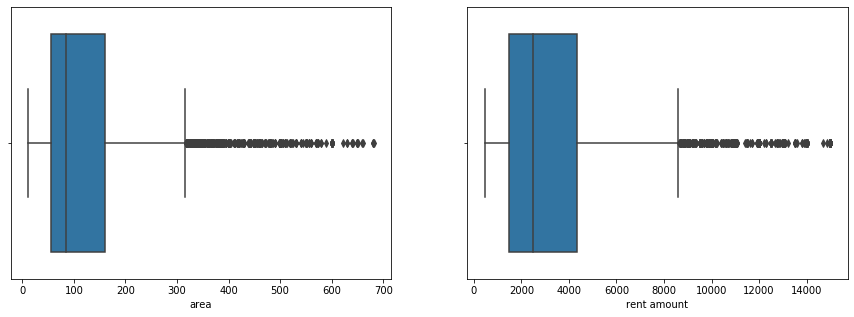

In [72]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.boxplot(x=df3['area'], ax = axs[0])
sns.boxplot(x=df3['rent amount'], ax = axs[1])

plt.show()

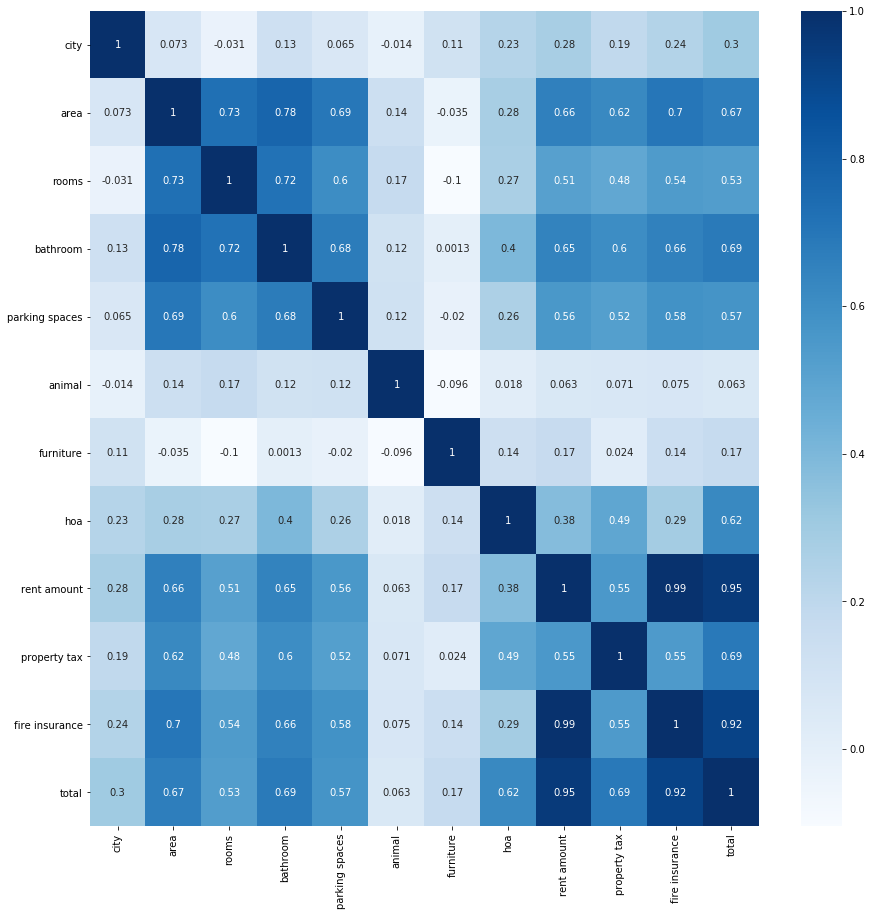

In [73]:
plt.figure(figsize=(15,15))
c = df3.corr()
sns.heatmap(c,cmap='Blues', annot=True)


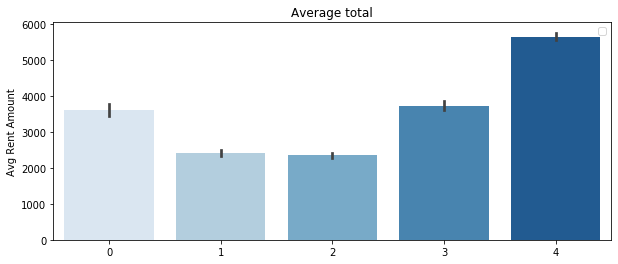

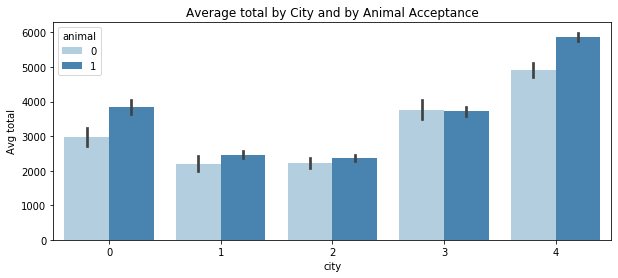

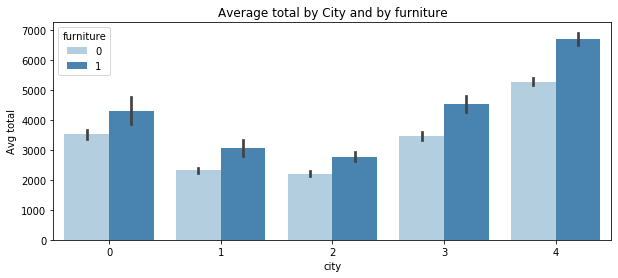

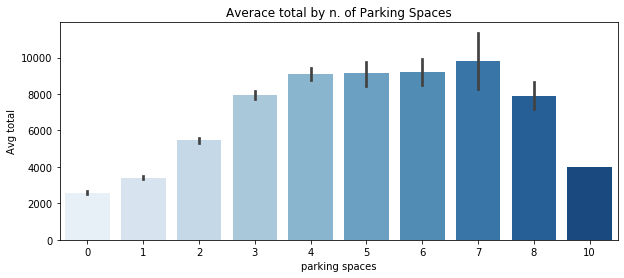

Text(0.5, 1.0, 'Average total by City and by area ')

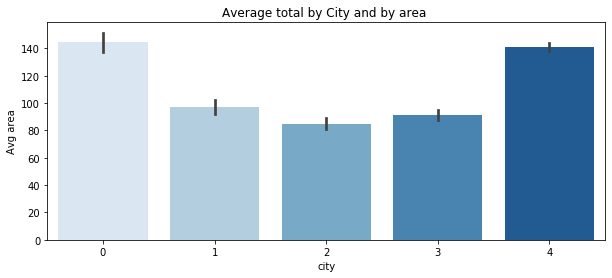

In [74]:
from numpy import mean

plt.figure(figsize = (10,4))
sns.barplot(data = df3, x='city', y='total', estimator=mean, palette = "Blues")
plt.ylabel('Avg Rent Amount')
plt.xlabel('')
plt.title('Average total')
plt.legend('')

plt.figure(figsize = (10,4))
sns.barplot(x='city', y='total', data = df3, hue = 'animal', palette='Blues', estimator = mean)
plt.ylabel('Avg total')
plt.title('Average total by City and by Animal Acceptance')

plt.figure(figsize = (10,4))
sns.barplot(x='city', y='total', data = df3, hue ='furniture', palette='Blues', estimator = mean)
plt.ylabel('Avg total')
plt.title('Average total by City and by furniture')

plt.figure(figsize = (10,4)) 
sns.barplot(x='parking spaces', y='total', data = df3, palette='Blues', estimator=mean)
plt.ylabel('Avg total')
plt.title('Averace total by n. of Parking Spaces')
plt.show()

plt.figure(figsize = (10,4))
sns.barplot(x='city', y='area', data = df3, palette='Blues', estimator = mean)
plt.ylabel('Avg area')
plt.title('Average total by City and by area ')


In [75]:
df4=df3

In [76]:
df4.shape

(10041, 12)

In [77]:
c=df4.corr()

In [78]:
c['total']

city              0.303727
area              0.671775
rooms             0.533597
bathroom          0.688641
parking spaces    0.573870
animal            0.063146
furniture         0.172157
hoa               0.622417
rent amount       0.954340
property tax      0.689366
fire insurance    0.920206
total             1.000000
Name: total, dtype: float64

In [79]:
df4.describe()

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
count,10041.000000,10041.000000,10041.000000,10041.000000,10041.000000,10041.000000,10041.000000,10041.000000,10041.000000,10041.000000,10041.000000,10041.000000
mean,2.953789,124.985360,2.419878,2.104472,1.487003,0.773529,0.236431,816.390001,3405.876905,270.925007,46.420078,4539.788567
std,1.417048,104.049806,1.123269,1.293156,1.481444,0.418569,0.424911,928.857584,2713.350549,438.489246,37.868637,3504.765060
min,0.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,450.000000,0.000000,3.000000,499.000000
25%,2.000000,55.000000,2.000000,1.000000,0.000000,1.000000,0.000000,170.000000,1500.000000,34.000000,20.000000,1997.000000
50%,4.000000,85.000000,2.000000,2.000000,1.000000,1.000000,0.000000,540.000000,2500.000000,111.000000,33.000000,3350.000000
75%,4.000000,160.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1100.000000,4348.000000,318.000000,59.000000,5936.000000
max,4.000000,682.000000,10.000000,10.000000,10.000000,1.000000,1.000000,8000.000000,15000.000000,10830.000000,226.000000,17520.000000


Lets explore area feature:

In [80]:
df4['area'].mean()

124.985360023902

In [81]:
df4['area'].max()

682

In [82]:
df4['area'].min()

11

In [83]:
df4[df4['area']<15]

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
785,4,11,1,1,0,0,1,300,2000,42,26,2368
1588,4,13,1,1,0,1,0,0,2200,42,28,2270
4864,4,13,1,1,0,1,0,0,2200,5,28,2233
6784,4,12,1,1,0,0,0,0,950,50,13,1013


In [84]:
df4[df4['area']>600]

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
570,0,680,7,6,8,1,0,0,8000,428,132,8560
2050,0,622,5,5,6,1,0,0,10000,924,164,11090
3647,0,682,6,7,6,1,0,0,5500,428,91,6019
6996,0,640,6,7,5,1,1,0,6141,667,101,6909
7645,0,659,5,4,6,1,0,0,11000,913,181,12090
1206,4,642,4,7,4,1,0,0,9050,250,137,9437
1276,4,629,4,4,4,1,0,0,15000,2064,226,17290
1774,4,640,4,4,4,1,1,5400,10200,1584,130,17310
3570,4,650,4,6,6,1,0,0,8500,1600,128,10230
4471,4,630,4,6,4,0,0,0,12300,2667,185,15150


In [85]:
df5=df4
type(df5)

pandas.core.frame.DataFrame

consider,
Usually room need minimum 15 unit of area and maximum 200 unit. those data values which are beyond this values are certainly outliers.
lets explore them and clean the data:

In [86]:
df5[(df5.area/df5.rooms)<15]

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
2867,0,100,7,2,1,1,0,0,2800,28,46,2874
7770,0,25,2,1,0,0,0,0,2200,104,30,2334
325,2,28,2,1,1,1,0,0,600,0,11,611
20,4,100,7,4,0,1,0,0,3800,118,58,3976
785,4,11,1,1,0,0,1,300,2000,42,26,2368
1588,4,13,1,1,0,1,0,0,2200,42,28,2270
2899,4,41,3,2,1,0,1,0,6500,0,83,6583
3935,4,35,5,1,0,1,0,0,2500,200,38,2738
4194,4,35,3,2,0,1,0,0,1600,84,25,1709
4864,4,13,1,1,0,1,0,0,2200,5,28,2233


In [87]:
df5.shape

(10041, 12)

In [88]:
df5

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
21,0,42,1,1,1,0,1,470,2690,172,36,3368
27,0,64,2,2,1,1,0,352,1500,80,20,1952
37,0,80,3,2,1,1,0,0,11000,425,181,11610
42,0,200,4,2,1,0,0,850,2550,9,34,3443
43,0,45,1,1,1,1,0,500,1631,192,12,2335
...,...,...,...,...,...,...,...,...,...,...,...,...
10681,4,230,3,5,3,0,0,3800,11000,1100,140,16040
10683,4,280,4,4,2,1,0,4200,4000,1042,51,9293
10685,4,83,3,2,2,1,0,888,7521,221,96,8726
10686,4,150,3,3,2,0,1,0,13500,0,172,13670


In [89]:
df5=df5[df5.area/df5.rooms>15]

In [90]:
df5

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
21,0,42,1,1,1,0,1,470,2690,172,36,3368
27,0,64,2,2,1,1,0,352,1500,80,20,1952
37,0,80,3,2,1,1,0,0,11000,425,181,11610
42,0,200,4,2,1,0,0,850,2550,9,34,3443
43,0,45,1,1,1,1,0,500,1631,192,12,2335
...,...,...,...,...,...,...,...,...,...,...,...,...
10681,4,230,3,5,3,0,0,3800,11000,1100,140,16040
10683,4,280,4,4,2,1,0,4200,4000,1042,51,9293
10685,4,83,3,2,2,1,0,888,7521,221,96,8726
10686,4,150,3,3,2,0,1,0,13500,0,172,13670


In [91]:
df5.shape

(10006, 12)

In [92]:
df5[df5.area/df5.rooms>200]

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
592,0,450,2,2,5,1,0,0,1512,71,25,1608
666,0,405,2,3,0,1,0,3500,4000,699,54,8253
10619,0,360,1,1,8,1,0,0,2190,167,36,2393
10661,1,250,1,2,2,1,0,0,2200,602,34,2836
2109,2,225,1,2,0,1,0,0,3500,218,63,3781
1138,3,500,2,5,5,0,0,0,1810,54,28,1892
7226,3,500,2,5,5,0,0,0,1810,54,28,1892
1635,4,418,2,4,3,0,0,5274,6875,117,88,12350
4338,4,440,1,2,4,1,0,1,9800,584,148,10530
6202,4,650,3,7,2,1,0,0,9900,600,149,10650


In [93]:

df5=df5[df5.area/df5.rooms<200]

In [94]:
df5

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
21,0,42,1,1,1,0,1,470,2690,172,36,3368
27,0,64,2,2,1,1,0,352,1500,80,20,1952
37,0,80,3,2,1,1,0,0,11000,425,181,11610
42,0,200,4,2,1,0,0,850,2550,9,34,3443
43,0,45,1,1,1,1,0,500,1631,192,12,2335
...,...,...,...,...,...,...,...,...,...,...,...,...
10681,4,230,3,5,3,0,0,3800,11000,1100,140,16040
10683,4,280,4,4,2,1,0,4200,4000,1042,51,9293
10685,4,83,3,2,2,1,0,888,7521,221,96,8726
10686,4,150,3,3,2,0,1,0,13500,0,172,13670


In [95]:
df5.shape

(9984, 12)

below is the correlation of differnt features with total from our cleaned data

In [96]:
c=df5.corr()
c['total']

city              0.304358
area              0.677176
rooms             0.534585
bathroom          0.688942
parking spaces    0.575808
animal            0.062198
furniture         0.172825
hoa               0.622778
rent amount       0.954369
property tax      0.691043
fire insurance    0.920276
total             1.000000
Name: total, dtype: float64

In [97]:
df5=df5.drop(['furniture','animal'],axis='columns')

In [98]:
x=df5.drop('total',axis='columns')
y=df5['total']
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(x)
chi_selector = SelectKBest(chi2, k=7)
chi_selector.fit(X_norm, y)
chi_support = chi_selector.get_support()
chi_feature = x.loc[:,chi_support].columns.tolist()
chi_feature

['city',
 'area',
 'bathroom',
 'parking spaces',
 'hoa',
 'rent amount',
 'fire insurance']

lets drop some features which are not much important based on the above data

In [99]:
df6=df5.drop(['parking spaces','property tax'],axis='columns')

In [100]:
df6

,city,area,rooms,bathroom,hoa,rent amount,fire insurance,total
21,0,42,1,1,470,2690,36,3368
27,0,64,2,2,352,1500,20,1952
37,0,80,3,2,0,11000,181,11610
42,0,200,4,2,850,2550,34,3443
43,0,45,1,1,500,1631,12,2335
...,...,...,...,...,...,...,...,...
10681,4,230,3,5,3800,11000,140,16040
10683,4,280,4,4,4200,4000,51,9293
10685,4,83,3,2,888,7521,96,8726
10686,4,150,3,3,0,13500,172,13670


lets save our clean data using pickle into housing data file

In [101]:
import pickle
with open('housing_data','wb') as file:
    pickle.dump(df6,file)

In [102]:
with open('housing_data','rb') as file:
    mp=pickle.load(file)

In [103]:
mp.head()

,city,area,rooms,bathroom,hoa,rent amount,fire insurance,total
21,0,42,1,1,470,2690,36,3368
27,0,64,2,2,352,1500,20,1952
37,0,80,3,2,0,11000,181,11610
42,0,200,4,2,850,2550,34,3443
43,0,45,1,1,500,1631,12,2335


lets create X and y for model preparation:

In [104]:
X=df6.drop('total',axis='columns')

In [105]:
X

,city,area,rooms,bathroom,hoa,rent amount,fire insurance
21,0,42,1,1,470,2690,36
27,0,64,2,2,352,1500,20
37,0,80,3,2,0,11000,181
42,0,200,4,2,850,2550,34
43,0,45,1,1,500,1631,12
...,...,...,...,...,...,...,...
10681,4,230,3,5,3800,11000,140
10683,4,280,4,4,4200,4000,51
10685,4,83,3,2,888,7521,96
10686,4,150,3,3,0,13500,172


In [106]:
y=df6['total']

In [107]:
y

21        3368
27        1952
37       11610
42        3443
43        2335
         ...  
10681    16040
10683     9293
10685     8726
10686    13670
10691     1587
Name: total, Length: 9984, dtype: int64

# **Split the data into training and testing:**
we will keep test size as 20% of data.

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

To apply the other algorithms and check the accuracy with differnt parameters we will define python function.we will use cross_val_score to increase accuracy by training data in n_splits.

**We will apply following algorithms:**
*   Linear Regression
*   Logistic Regression
*   lasso
*   Desicion tree





In [110]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/home/rupam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275951411.8333465, tolerance: 9853516.58480854
  positive)
/home/rupam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374136388.79793966, tolerance: 9774515.357298834
  positive)
/home/rupam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 206211140.09103462, tolerance: 9748237.426599275
  positive)
/home/rupam/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the nu

,model,best_score,best_params
0,linear_regression,0.992011,{'normalize': True}
1,lasso,0.992008,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.983247,"{'criterion': 'mse', 'splitter': 'random'}"


This shows that  is linear regression is giving maximum accuracy. So we will select it for further process.

Lets predict test model with other data

In [111]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize=True)
model.fit(X_train,y_train)
score=model.score(X_test,y_test)
score

0.9915158263616495

## **our model has 99.15% of accuracy**

In [112]:
model.coef_

array([ 15.69027   ,   1.6228052 , -23.71711935,  49.48423961,
         1.16527751,   0.94221371,   6.16295272])

In [113]:
model.intercept_

-203.29971031479454

In [114]:
city_info

,0,label
0,São Paulo,4
1,Porto Alegre,2
2,Rio de Janeiro,3
3,Campinas,1
4,Belo Horizonte,0


following is the function to predict total price

In [115]:
def predict_price(city,area,rooms,bathroom,hoa,rent_amount,fire_insurance):
    total_price=model.predict([[city,area,rooms,bathroom,hoa,rent_amount,fire_insurance]])
    return total_price

In [116]:
predict_price(0,150,4,5,1300,1500,1000)

array([9283.80783762])

In [117]:
predict_price(1,150,4,5,1300,1500,1000)

array([9299.49810761])

In [118]:
predict_price(2,150,4,5,1300,1500,1000)

array([9315.18837761])

In [119]:
predict_price(3,150,4,5,1300,1500,1000)

array([9330.87864761])

In [120]:
predict_price(4,150,4,5,1300,1500,1000)

array([9346.5689176])

In above cases we predict price for same data in differnt cities. And as expected, prices are high in city no '4' ie. 'São Paulo'

### **Conclusion:**
Hence, We successfully build a model for predicting total amount for renting house in brazil in differnt cities.